<a href="https://colab.research.google.com/github/caiobellezi/estudos/blob/master/Seaborn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotar graficos com dados categoricos

Categorical scatterplots:

stripplot() (with kind="strip"; the default)

swarmplot() (with kind="swarm")

Categorical distribution plots:

boxplot() (with kind="box")

violinplot() (with kind="violin")

boxenplot() (with kind="boxen")

Categorical estimate plots:

pointplot() (with kind="point")

barplot() (with kind="bar")

countplot() (with kind="count")

In [ ]:
#importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#escolher o estilo dos plots
sns.set(style="ticks", color_codes=True)

In [ ]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


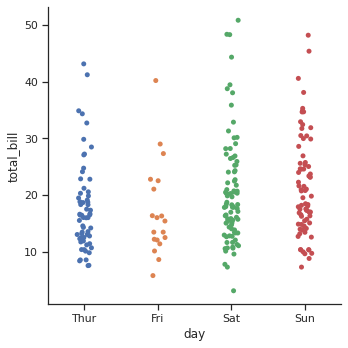

In [ ]:
sns.catplot(x="day", y="total_bill", data=tips);

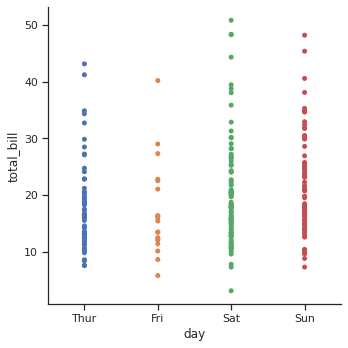

In [ ]:
#é possivel desativar o "Jitter", a variação, movimentos irregulares
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

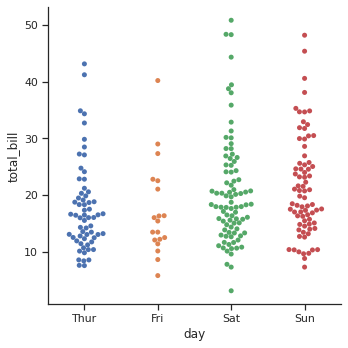

In [ ]:
#swarm = enxame
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

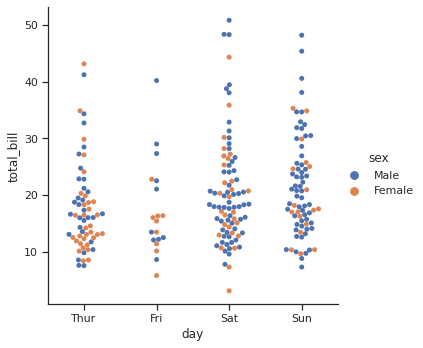

In [ ]:
#separar categorias por cores
sns.catplot(x="day", y="total_bill", hue='sex', kind="swarm", data=tips);

Unlike with numerical data, it is not always obvious how to order the levels of the categorical variable along its axis. In general, the seaborn categorical plotting functions try to infer the order of categories from the data. If your data have a pandas Categorical datatype, then the default order of the categories can be set there. If the variable passed to the categorical axis looks numerical, the levels will be sorted. But the data are still treated as categorical and drawn at ordinal positions on the categorical axes (specifically, at 0, 1, …) even when numbers are used to label them:

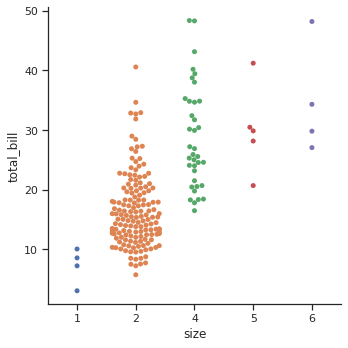

In [ ]:
sns.catplot(x='size', y='total_bill', kind='swarm', data=tips.query('size !=3'));

In [ ]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

The other option for choosing a default ordering is to take the levels of the category as they appear in the dataset. The ordering can also be controlled on a plot-specific basis using the order parameter. This can be important when drawing multiple categorical plots in the same figure, which we’ll see more of below:

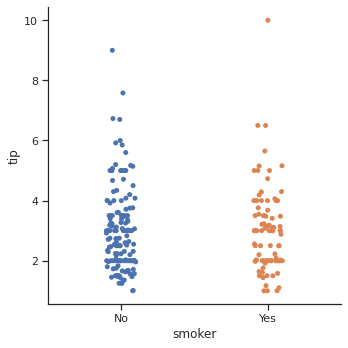

In [ ]:
sns.catplot(x='smoker', y='tip', order=['No', 'Yes'], data=tips);

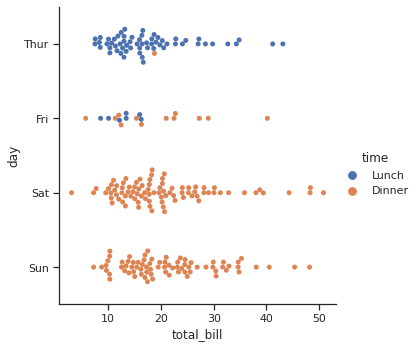

In [ ]:
#geralmente o dado categorico fica no eixo X, mas também é possivel plota-lo no eixo Y
sns.catplot(x="total_bill", y='day', hue='time', kind='swarm', data=tips);

# Boxplot com dados categoricos
## observação de distribuições dentro das categorias

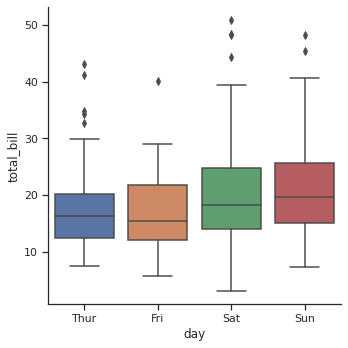

In [ ]:
sns.catplot(data=tips, kind='box', x='day', y='total_bill');

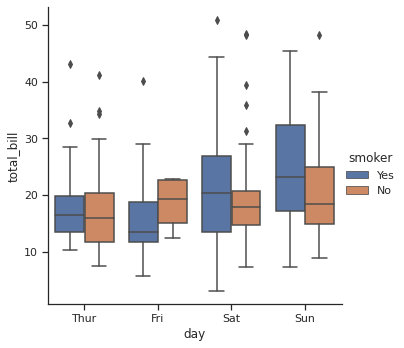

In [ ]:
#ao acrescentar a semantica hue, o box não é sobreposto, ele é movido para ao lado do eixo da sua respectiva categoria
sns.catplot(data=tips, kind='box', x='day', y='total_bill', hue='smoker');

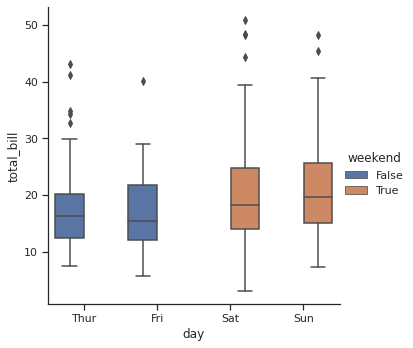

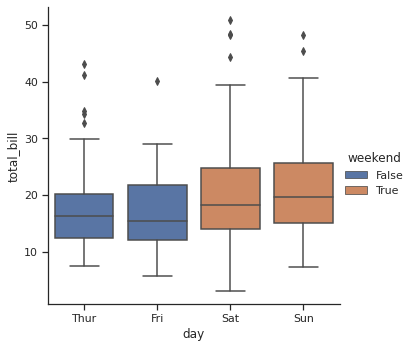

In [ ]:
#com esquiva, ativada por padrão
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=True, data=tips);

#sem esquiva
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);            

Para grandes datasets, utilizar `sns.boxenplot()`, ela é mais otimizada para grandes datasets


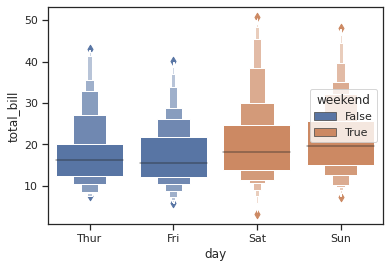

In [ ]:
sns.boxenplot(x="day", y="total_bill", hue="weekend",
            dodge=False, data=tips);

In [ ]:
diamonds = sns.load_dataset("diamonds")
print(diamonds.shape)
diamonds.head()


(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


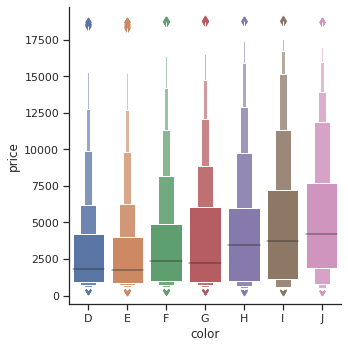

In [ ]:
sns.catplot(x='color', y='price', kind='boxen', data=diamonds.sort_values("color"));

# Violin Plots

Combina o boxplot com a densidade

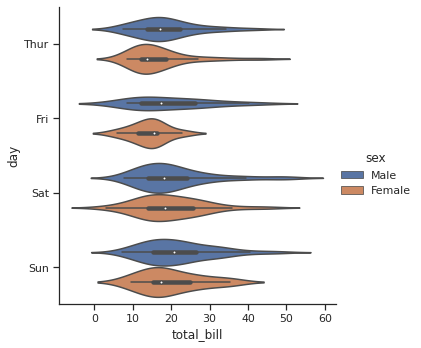

In [ ]:
sns.catplot(x='total_bill', y='day', hue='sex', kind='violin', data=tips);

Vantagem de visualizar o KDE, e dentro o boxplot com os quartis, e mediana
problema que pode complicar a visualização e precisar de alguns ajustes nos parametros

bw : {'scott', 'silverman', float}, optional
    Either the name of a reference rule or the scale factor to use when
    computing the kernel bandwidth. The actual kernel size will be
    determined by multiplying the scale factor by the standard deviation of
    the data within each bin.


cut : float, optional
    Distance, in units of bandwidth size, to extend the density past the
    extreme datapoints. Set to 0 to limit the violin range within the range
    of the observed data (i.e., to have the same effect as ``trim=True`` in
    ``ggplot``

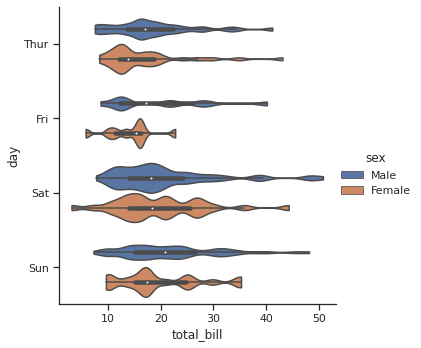

In [ ]:
sns.catplot(x='total_bill', y='day', hue='sex', 
            kind='violin', bw=.15, cut=0,
            data=tips);
#sns.violinplot?

é possivel dividir o violino quando são duas variaveis categoricas

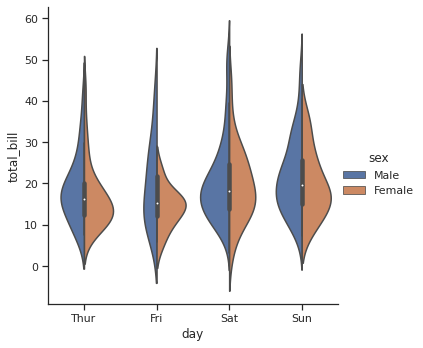

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

inner : {"box", "quartile", "point", "stick", None}, optional
    Representation of the datapoints in the violin interior. If ``box``,
    draw a miniature boxplot. If ``quartiles``, draw the quartiles of the
    distribution.  If ``point`` or ``stick``, show each underlying
    datapoint. Using ``None`` will draw unadorned violins.

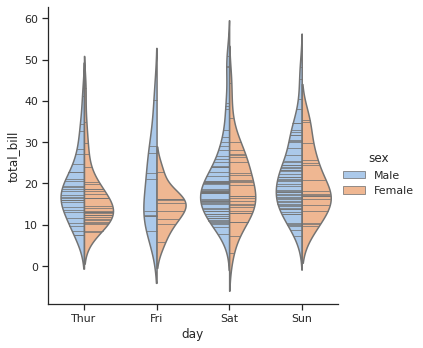

In [ ]:
sns.catplot(x='day', y='total_bill', hue='sex',
            inner='stick', split=True, palette='pastel',
            kind='violin',data=tips);
sns.violinplot?

It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution:

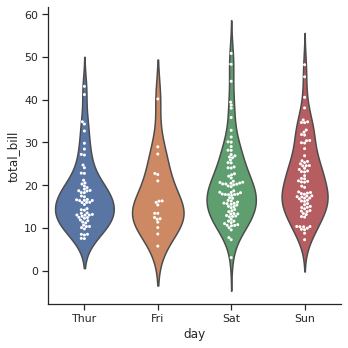

In [ ]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="w", size=3, data=tips, ax=g.ax);

# Barplots

---



---



In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


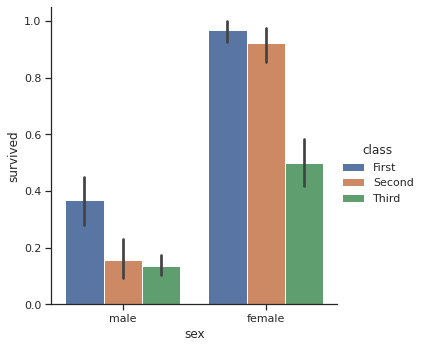

In [ ]:
sns.catplot(x='sex', y='survived',
            hue='class', kind='bar', data=titanic);

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

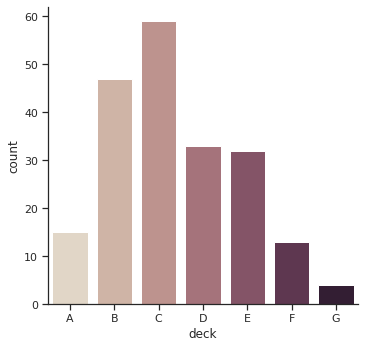

In [ ]:
sns.catplot(x='deck',
            kind='count',
            palette="ch:.25",
            data=titanic)

tanto barplot quanto countplot pode ser usados com as caterias no eixo y


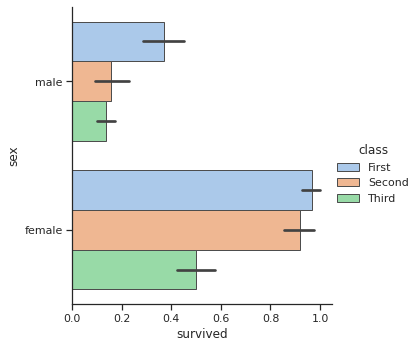

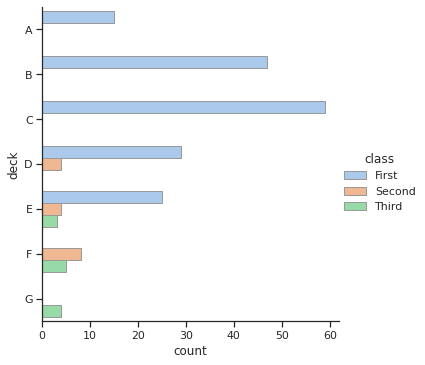

In [ ]:
sns.catplot(x='survived',
            y='sex', palette='pastel', edgecolor=".3",
            hue='class', kind='bar', data=titanic);


sns.catplot(y='deck',
            palette='pastel', edgecolor=".6",
            hue='class', kind='count', data=titanic);

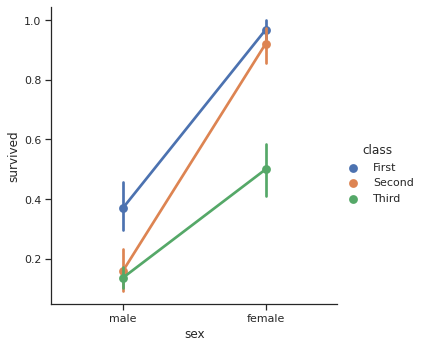

In [ ]:
#pointplot

sns.catplot(x='sex', y='survived', hue='class',
            kind='point', data=titanic)

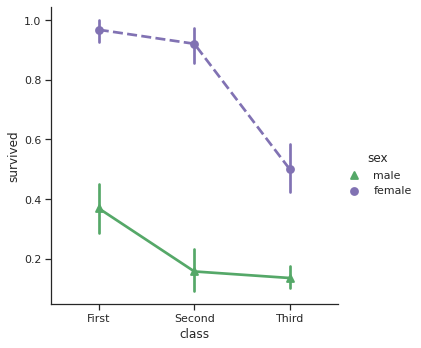

In [ ]:
sns.catplot(x='class', y='survived', hue='sex',
            palette={"male":"g", "female":"m"},
            markers=['^','o'],
            linestyles=['-','--'],
            kind='point', data=titanic);

# Showing multiple relationships with facets

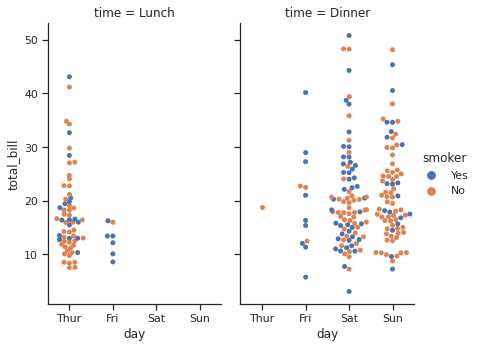

In [ ]:
sns.catplot(x='day', y='total_bill', hue='smoker', col='time', aspect=0.6, kind='swarm', data=tips);

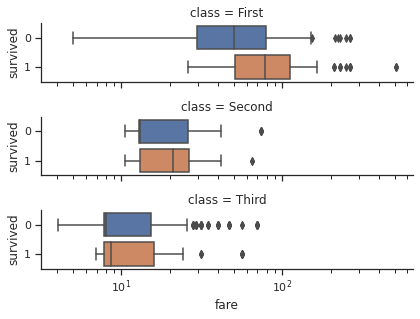

In [ ]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");